In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import pickle

'''
# Load API Key and download directory from config file
CONFIG_FILE = "../config/api-call.json"

def load_config(config_path):
    """Load configuration from a JSON file."""
    with open(config_path, "r") as file:
        return json.load(file)

# Load config values
config = load_config(CONFIG_FILE)

# print(config)
DOWNLOAD_DIR = config["ned"]["ned_download_dir"]
print("DOWNLOAD_DIR :", DOWNLOAD_DIR)
pkl_file_path = f'{DOWNLOAD_DIR}/power-gen-type-0.pkl'

# with open('../data/dc-ned-json-data-1.pkl', 'rb') as pickle_file:
with open(pkl_file_path, 'rb') as pickle_file:
    dc_ned_json_data_1 = pickle.load(pickle_file)
'''

# Load the existing CSV file
df = pd.read_csv('../../src/data/ned-api/power-gen-type-2022-2024-0.csv', index_col=0, parse_dates=True)
print("CSV file loaded successfully!")

df.index.name = 'validto'

# Zorg ervoor dat de datumkolom wordt herkend als datetime
df['validto'] = pd.to_datetime(df['validto'])


CSV file loaded successfully!


/var/folders/gy/xs43v__d0mn25qy5kzxrnkrm0000gn/T/ipykernel_34401/1417418581.py:29: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('../../src/data/ned-api/power-gen-type-2022-2024-0.csv', index_col=0, parse_dates=True)


In [7]:
# Ensure the date column is recognized as datetime
df.index = pd.to_datetime(df.index)

# Filter the data for the years 2022 and 2023
# df_filtered = df.loc['2022-01-01':'2023-12-31']

df_filtered = df

# Extract month and year for grouping
df_filtered["month"] = df_filtered["validto"].dt.strftime("%Y-%m")  # Format: YYYY-MM

# Group data by month
grouped_data = [df_filtered[df_filtered["month"] == month]["capacity"] for month in df_filtered["month"].unique()]

# Create a boxplot of the Capacity column for the years 2022
plt.figure(figsize=(12, 6))
plt.boxplot(grouped_data, labels=df["month"].unique(), patch_artist=True)
plt.xlabel('capacity')
plt.title('Boxplot of capacity for the Years 2022')
plt.show()


# Plot line graph for each month

# Group data by month
grouped_data_linegraph = {month: df_filtered[df_filtered["month"] == month] for month in df_filtered["month"].unique()}

plt.figure(figsize=(12, 6))
for month, data in grouped_data_linegraph.items():
    plt.plot(data["validto"], data["capacity"], label=month)  # Line plot for each month

# Beautify plot
plt.xlabel("Validto")
plt.ylabel("Capacity")
plt.title("Time Series Data (Line Graph by Month)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show plot
plt.show()



/var/folders/gy/xs43v__d0mn25qy5kzxrnkrm0000gn/T/ipykernel_34401/2281940262.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(df.index)


DateParseError: Unknown datetime string format, unable to parse: /v1/utilizations/23791261744, at position 0

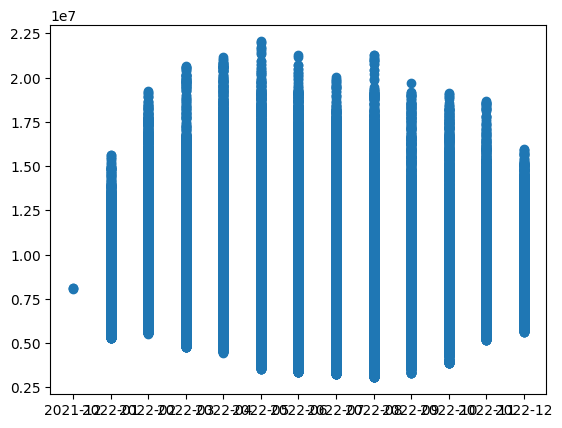

In [11]:
plt.scatter(df_filtered['month'], df_filtered['capacity'])
plt.show()

In [8]:
import numpy as np

# Calculate the correlation coefficient
r = np.corrcoef(df_filtered['capacity'], df_filtered['validto'])
print("Correlation coefficient matrix:")
print(r)

TypeError: unsupported operand type(s) for +: 'Timestamp' and 'Timestamp'

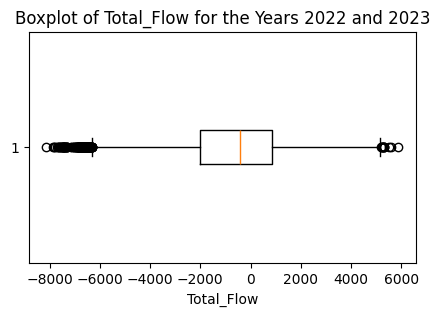

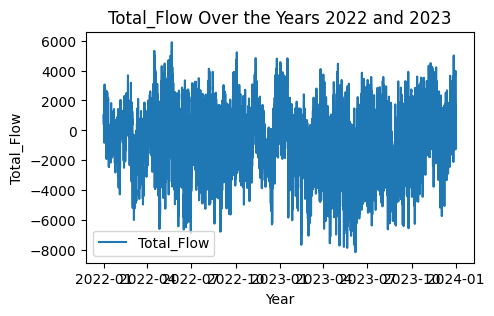

In [74]:
# Create a boxplot of the Total_Flow column for the years 2022 and 2023
plt.figure(figsize=(5,3))
plt.boxplot(df_filtered['Total_Flow'].dropna(), vert=False)
plt.xlabel('Total_Flow')
plt.title('Boxplot of Total_Flow for the Years 2022 and 2023')
plt.show()

# Plot the load over the years 2022 and 2023
plt.figure(figsize=(5,3))
plt.plot(df_filtered.index, df_filtered['Total_Flow'], label='Total_Flow')
plt.xlabel('Year')
plt.ylabel('Total_Flow')
plt.title('Total_Flow Over the Years 2022 and 2023')
plt.legend()
plt.show()


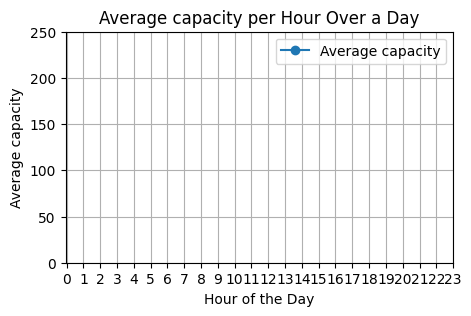

In [11]:
# Drop rows with missing values in 'Price' column
df_filtered_price = df_filtered[['capacity']].dropna()

# Extract the hour from the index
df_filtered_price['Hour'] = df_filtered_price.index.hour

# Calculate the average price per hour
average_price_per_hour = df_filtered_price.groupby('Hour')['capacity'].mean()

# Plot the average price per hour
plt.figure(figsize=(5,3))
plt.plot(average_price_per_hour.index, average_price_per_hour, marker='o', linestyle='-', label='Average capacity')
plt.xlabel('Hour of the Day')
plt.ylabel('Average capacity')
plt.title('Average capacity per Hour Over a Day')
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.grid(True)
plt.legend()
plt.ylim(0,250)
plt.show()

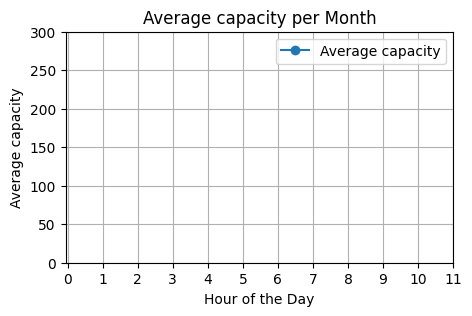

In [13]:
# Extract the month from the index
df_filtered_price['Month'] = df_filtered_price.index.month

# Calculate the average price per month
average_price_per_month = df_filtered_price.groupby('Month')['capacity'].mean()

# Plot the average price per month
plt.figure(figsize=(5,3))
plt.plot(average_price_per_month.index, average_price_per_month, marker='o', linestyle='-', label='Average capacity')
plt.xlabel('Hour of the Day')
plt.ylabel('Average capacity')
plt.title('Average capacity per Month')
plt.xticks(range(12))  # Ensure all months are shown on the x-axis
plt.grid(True)
plt.legend()
plt.ylim(0,300)
plt.show()